In [ ]:
import pandas as pd

# load dataset
df = pd.read_csv("creditcard.csv")

# check shape
df.shape

(284807, 31)

In [ ]:
# check class distribution
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# check shapes
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
from sklearn.model_selection import train_test_split

# stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# check shapes
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [ ]:
# check class distribution in train and test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialize logistic regression with class balancing
lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# train model
lr.fit(X_train, y_train)

# predictions
y_pred_lr = lr.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# train model
rf.fit(X_train, y_train)

# predictions
y_pred_rf = rf.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# get feature importances
importances = rf.feature_importances_

# create dataframe
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)

# show top 10
feature_importance_df.head(10)

,feature,importance
14,V14,0.179857
10,V10,0.115442
12,V12,0.096206
4,V4,0.095646
17,V17,0.095113
3,V3,0.068669
11,V11,0.056112
16,V16,0.040303
2,V2,0.036265
9,V9,0.026888


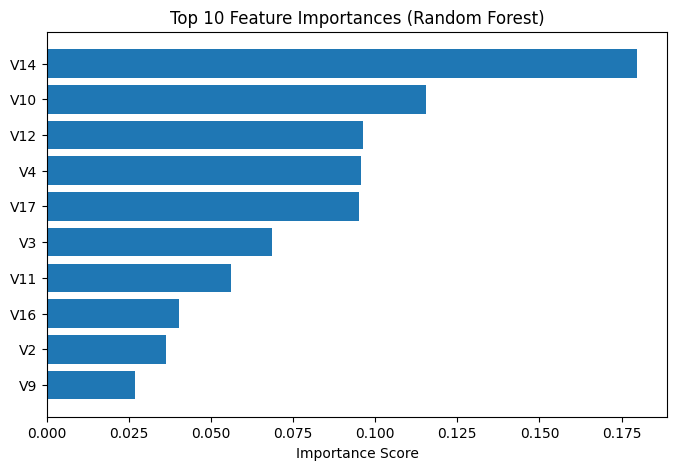

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df['feature'][:10],
    feature_importance_df['importance'][:10]
)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

### Model Comparison Summary

| Model | Fraud Precision | Fraud Recall | Fraud F1-score |
|------|----------------|--------------|----------------|
| Logistic Regression | Low | High | Low |
| Random Forest | High | High | High |

In [ ]:
import joblib

# save trained Random Forest model
joblib.dump(rf, "random_forest_fraud_model.pkl")

['random_forest_fraud_model.pkl']

In [ ]:
import os
os.listdir()

['.config', 'random_forest_fraud_model.pkl', 'creditcard.csv', 'sample_data']